# Chapter 2: Descriptive Data Analysis

In [12]:
from IPython.display import Markdown
base_path = (
    "https://raw.githubusercontent.com/rezahabibi96/GitBook/refs/heads/main/"
    "books/applied-statistics-with-python/.resources"
)

In [1]:
import math
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

import requests
from io import BytesIO

This chapter reviews the ideas of **Descriptive Statistics** that summarize a sample in terms of means, standard deviations, counts, visualizations, etc. There are no attempts to generalize sample statistics to the entire population (**Inferential Statistics**).

## Numerical Data

We defined in the previous introductory chapter numerical data as quantitative data that could be described with numbers. In this chapter, we review standard measures of center and spread of such data. In addition to introducing basic Statistics definitions, we introduce some new ideas such as dealing with NAs, trimmed mean, etc.

### Sample and Population Means

We start with the most standard measure of center of a numerical sample, the **mean** (average). For a sample of $n$ measurements $x_1, x_2, ..., x_n$, the mean is defined as:

$$
\bar{x} = \frac{x_1 + x_2 + ... + x_n}{n} = \frac{1}{n} \sum_{i=1}^{n}x_i
$$

The way to compute it depends on whether you are dealing with a small set of data to be typed into an array manually or a data file. Let's first assume that we just have a small data set of heights for students in a class, and we want to find the average. A Python array can be defined with `[]`, but the *numpy* library needs to be imported to use numerical arrays and statistical functions effectively. Numpy arrays are better for Statistics, as they are vectorized (addition, subtraction, and many other operations are automatically done element-by-element) and have a rich set of mathematical functions. First, *np.array()* is defined, then *np.mean* is used to compute the mean. The results are printed with format specifications like {: .4f} to display the desired number of digits rather than the full 16 double-digits-accuracy.

In [ ]:
x = np.array([69,64,63,73,74,64,66,70,70,68,67])
xbar = np.mean(x)

print('xbar = {:.4f} for n = {:d} observations'.format(xbar,len(x)))

xbar = 68.0000 for n = 11 observations


Note that if any of the data are missing and represented by *nan*, the mean computes to *nan*. To avoid it, we have to adjust our command:

In [2]:
x = np.array([69,64,63,73,74,64,66,70,70,68,67,float("nan")])

xbar = np.mean(x); 
print('regular mean xbar = {:.4f}'.format(xbar))

xbar = np.nanmean(x); 
print('nanmean() xbar = {:.4f}'.format(xbar))

regular mean xbar = nan
nanmean() xbar = 68.0000


Alternatively, we can trim the mean to a specified percentage on low and high extremes.

In [ ]:
x = np.array([69,64,63,73,74,64,66,70,70,68,67,float("nan")])
xbar = stats.trim_mean(x,0.1)

print('trimmed mean xbar = {:.4f}'.format(xbar))

trimmed mean xbar = 68.5000


Next, let's fnd the average for a variable defined in the data file. We use cesd depression score in `HELPrct` data file, which we used before:

In [ ]:
url = f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url) 
print(mydata[['cesd','pcs','mcs']].head(10))

xbar = np.mean(mydata['cesd'])
print('mean of cesd = {:.4f}'.format(xbar))

   cesd        pcs        mcs
0    49  58.413689  25.111990
1    30  36.036942  26.670307
2    39  74.806328   6.762923
3    15  61.931679  43.967880
4    39  37.345585  21.675755
5     6  46.475212  55.508991
6    52  24.515039  21.793024
7    32  65.138008   9.160530
8    50  38.270878  22.029678
9    46  22.610598  36.143761
mean of cesd = 32.8477


We can also find the mean of several columns at once with *np.mean()* function or *.mean* method as illustrated below

In [9]:
print('Mean of the two columns using np.mean:')
print(np.mean(mydata[['cesd', 'mcs']], axis=0) )

print('\nMean of the two columns .mean():')
print(mydata[['cesd', 'mcs']].mean() )

Mean of the two columns using np.mean:
cesd    32.847682
mcs     31.676678
dtype: float64

Mean of the two columns .mean():
cesd    32.847682
mcs     31.676678
dtype: float64


We can also trim the means of data frame columns:

In [10]:
print('\nTrimmed mean from stats library : ', stats.trim_mean(mydata[['cesd', 'mcs']], 0.05))


Trimmed mean from stats library :  [33.06356968 31.31445885]


The `cesd` depression scores represent a sample from a population of such depression scores for all substance abusers. The **population mean** of all $N$ such patients' scores is found similarly:

$$ \mu = \frac{x_1 + x_2 + \cdots + x_N}{N} = \frac{\sum_{i=1}^{N} x_i}{N} $$

It is usually impractical to find the mean of the entire population, so $\mu$ is estimated using the sample mean $\bar{x}$. For the depression score, $\bar{x} = 32.85$ is a **point estimate** of the true population mean of the depression score for all such substance abusers. Naturally, for a larger sample, the accuracy improves. In a later chapter, we develop a quantitative way (confidence interval) to quantify the accuracy of such point estimates.

Consider the following interesting example of computing means. Assume an exam is given to 29 out of 30 students in the class on a regular date and the class mean is 72. The last remaining student takes a makeup exam due to family reasons and gets 84. What is the new mean? In this case, the actual exam scores are not given, however, the sum of scores for the 29 students who took the exam on the regular date can be found:

$$ \bar{x} = \frac{\sum x}{n} \quad \Rightarrow \quad \sum x = \bar{x} \cdot n = 72 \cdot 29 = 2088 $$

Then the new mean can be found as:

$$ \frac{72 \cdot 29 + 84}{30} = \frac{2088 + 84}{30} = 72.4 $$

which is a little bit higher than before, as it should be since the missing student's score is higher than the mean.

### Numerical Distribution Shape

A **histogram** is a graphical representation of numerical data that groups observations into bins. The width of the bins can be varied. The y-axis shows frequencies (number of observations) per bin. The high-level seaborn graphics library is used below to display the histogram of hourly wages from the CPS85 file (kde=True adds a smoothed-out density plot on top of the histogram):

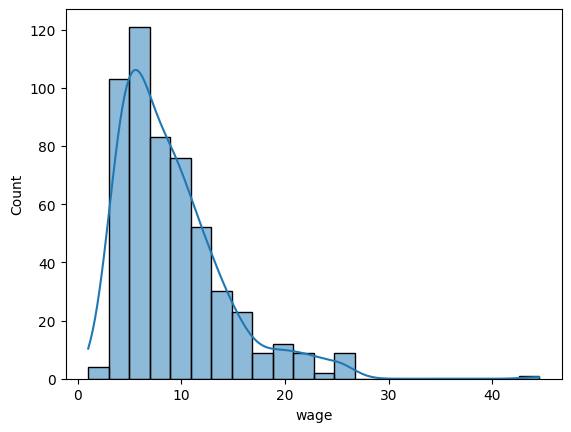

In [ ]:
url = f'{base_path}/CPS85.csv'
mydata = pd.read_csv(url)

# kde adds kernel density estimate smoothing histogram shape
# of the distribution. The binwidth allows varying the number of bins.
sns.histplot(data=mydata, x="wage", binwidth=2, kde=True);

The **shape** of the histogram above indicates that most hourly workers made below $10/hour, much fewer made around $20/hour, and only one made over $40/hour (an outlier). The shape of hourly wages trails off to the right—**right-skewed shape**. The most common example of a right-skewed distribution is income. Most people stay in a lower income range with only a few making a lot, resulting in a long, thin tail to the right illustrated in the distribution of household income in 2014 reproduced below:

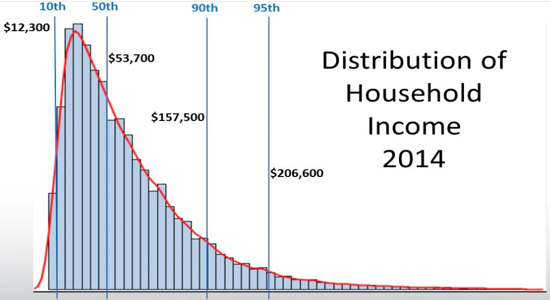

In [6]:
import requests
from PIL import Image
from io import BytesIO


url = f'{base_path}/Income2014.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((550, 300))

Next, the histogram of the retirement age data below has a longer tail to the left—**left-skewed shape**. Most people retire in their 60s and 70s, but a few could take early retirement in their 40s and 50s.

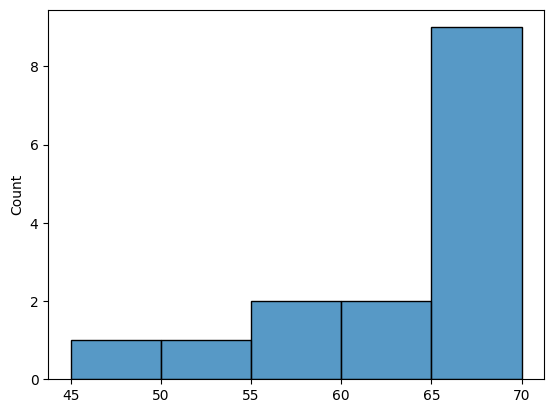

In [ ]:
x = np.array([69,45,67,52,57,59,65,64,65,65,70,67,67,62,65])
sns.histplot(x);

Finally, the Python code below generates **symmetric** (bell-shaped) distribution of test scores that trail o about the same left and right.

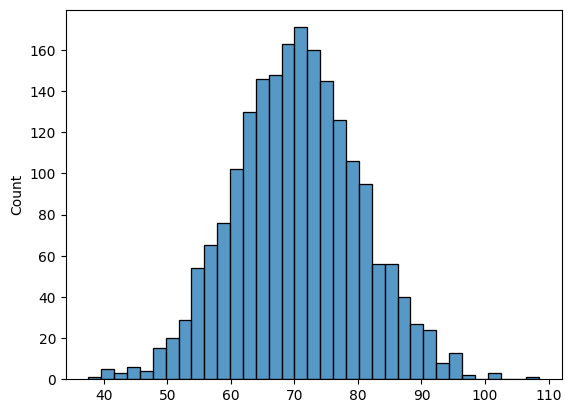

In [ ]:
np.random.seed(42)  # Set seed for reproducibility (optional) np.random.seed(42)

mean = 70; std_dev = 10 # Mean and standard deviation for the normal distribution
num_scores = 2000
test_scores = np.random.normal(mean, std_dev, num_scores)

sns.histplot(test_scores);

Histograms can help us to identify distribution **modes**—prominent peaks in the distribution. The histograms considered so far in this section all had only one mode (peak)—**unimodal**. A distribution with two modes is called **bimodal**, while a distribution with more than two modes is called **multimodal** as illustrated in the figure below:

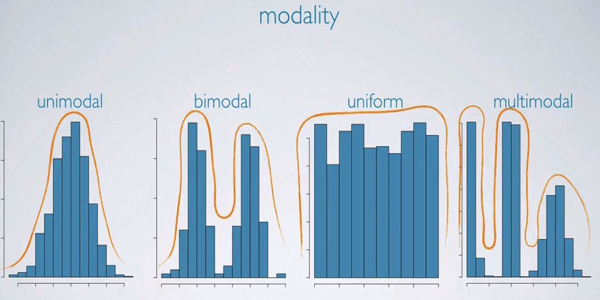

In [ ]:
url = f'{base_path}/UniBiMultiModal.jpg'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 300))

The modes are not very rigorously defined but help to get a better sense of the data. For example, a class grade distribution is often unimodal with only one prominent peak, which is assigned B or B- range. However, sometimes there are two separate groups of students with good and bad grades with their own peaks—bimodal.

### Variance and Standard Deviation

The mean describes the distribution's center, but the data's variability around the mean is equally important. In finance, variability (*volatility*) of investment returns measures its risk. The standard way to measure variability around the data mean is the **standard deviation**.

Define $d_i = x_i - \bar{x},\ i = 1,2,\ldots,n$ as deviations of data from the overall mean $\bar{x}$. The mean is at the center of the data, so some deviations are positive, while others are negative; therefore, they would cancel each other out in a sum or average:

$$ \sum d_i = \sum (x_i - \bar{x}) = \sum x_i - \sum \bar{x} = \bar{x} n - \bar{x} n = 0 $$

Instead, the **sample standard deviation** averages squared deviations:

$$ s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}} $$

The **sample variance** is just the square of sample standard deviation:

$$ s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1} $$

The division by the **degree of freedom** $n − 1$ rather than $n$ ensures that sample variance is an unbiased estimate of the true **population variance**:

$$ \sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N} $$

Let's illustrate it rst with the grades list considered before. Note the difference between population vs. sample standard deviation calculation in Python.

In [ ]:
x = np.array([69,64,63,73,74,64,66,70,70,68,67])
xbar = np.mean(x)
d = x- xbar
d2 = d**2

stdframe = pd.DataFrame({'x':x, 'xbar':np.repeat(xbar, len(x)), 'd':d, 'd2':d2})
print(stdframe,'\n')

print('sum of deviations =', np.sum(d), '\n')

s = np.std(x, ddof=1)       # sample standard deviation requires ddof=1
sig = np.std(x)             # population standard deviation (default)
print('s, sig = ', s, sig)

     x  xbar    d    d2
0   69  68.0  1.0   1.0
1   64  68.0 -4.0  16.0
2   63  68.0 -5.0  25.0
3   73  68.0  5.0  25.0
4   74  68.0  6.0  36.0
5   64  68.0 -4.0  16.0
6   66  68.0 -2.0   4.0
7   70  68.0  2.0   4.0
8   70  68.0  2.0   4.0
9   68  68.0  0.0   0.0
10  67  68.0 -1.0   1.0 

sum of deviations = 0.0 

s, sig =  3.63318042491699 3.4641016151377544


Now apply it to a data file column:

In [ ]:
url = f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url)

s = np.std(mydata['cesd'], ddof=1)
print('s = {:.4f} '.format(s))

s = 12.5145 


The standard deviation meaning is defined in terms of a given data distribution. We derive in a later chapter that for the **bell-shaped normal distribution**, about 68% of observations are within 1 standard deviation of the mean, 95% are within 2, and 99.7% are within 3, as shown in the figure below:

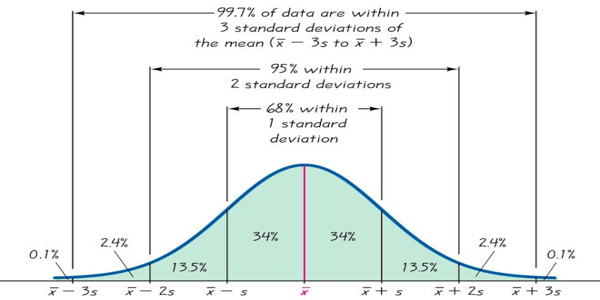

In [ ]:
url = f'{base_path}/Normal1s2s3s.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 300))

For example, the IQ score distribution tends to be bell-shaped and usually formatted so that the mean is 100 with a standard deviation of 15. Therefore:

Mean ± 1·sd = $100 \pm 1 \cdot 15 = (85,115)$ contains 68% of the data.

Mean ± 2·sd = $100 \pm 2 \cdot 15 = (70,130)$ contains 95% of the data.

Mean ± 3·sd = $100 \pm 3 \cdot 15 = (55,145)$ contains 99.7% of the data.

This is *only true for the symmetric bell-shaped distribution*; however, a general Chebyshev Theorem in Probability shows that the proportion of observations within $k$ standard deviations of the mean is at least $1 - \frac{1}{k^2}$. Therefore, even highly skewed bank accounts distribution is guaranteed to have at least $1 - \frac{1}{2^2} = 1 - \frac{1}{4} = \frac{3}{4} = 75%$ of the data within 2 standard deviations of the mean.

It should be noted that mean, standard deviations, and any other summary statistics do not completely describe the data. It is still crucial to look at the actual histogram. For example, the figure below shows three distributions that look quite different, but all have the same mean 0 and standard deviation 1. Using modality, we can distinguish between the first plot (bimodal) and the last two (unimodal). Using skewness, we can distinguish between the last plot (right-skewed) and the first two.

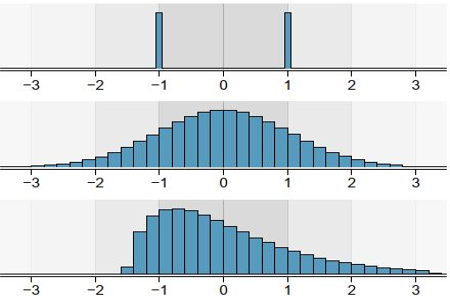

In [ ]:
url = f'{base_path}/SameMeanSd3distr.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((450, 300))

We made a note before that the standard deviation is in the same units as the original observations. Say, if the stock price is given in dollars, so is the standard deviation. However, how would you compare the variability of two data sets given in *different units* (say, stock prices in dollars vs. in pesos)? Analogously, how do you compare the variability of two stocks with very different overall prices—say, one stock sells in hundreds of dollars and another in cents.

To facilitate comparisons like that, define **coefficient of variation**:

$$CV = \frac{s}{\bar{x}} \times 100\%$$

A sample standard deviation and mean have the same units, so once divided, a non-dimensional number is obtained that scales with the magnitude of the observations. For high values of $CV$, the standard deviation is equal to a large percentage of the mean and the data is very volatile, while low CVs, say below 10%, are indicative of small volatility. Consider the data on two companies A and B stock prices below:

In [ ]:
StockA = np.array([1.23,1.50,2.27,0.54,2.40,3.10,5.18])
StockB = np.array([171,169,182,159,164,175,180,173,176,177])

Abar = np.mean(StockA)
sa = np.std(StockA,ddof=1)
CVa = sa/Abar*100
print('Company A: ')
print('Mean = {:.3f}, standard deviation = {:.3f}, CV = {:.3f}'.format(Abar,sa,CVa))

Bbar = np.mean(StockB)
sb = np.std(StockB,ddof=1)
CVb = sb/Bbar*100
print('Company B: ')
print('Mean = {:.3f}, standard deviation = {:.3f}, CV = {:.3f}'.format(Bbar,sb,CVb))

Company A: 
Mean = 2.317, standard deviation = 1.518, CV = 65.511
Company B: 
Mean = 172.600, standard deviation = 7.106, CV = 4.117


So stock B is a lot less volatile.

### Median, Quartiles, and Boxplot

The **median** is the middle value of the **ordered** data. Without the ordering, this definition makes no sense, so the first step is to rearrange the data into an ordered array. Then, the median is the value such that half of the observations are larger, and half are smaller. It is also the 50th percentile (50% below, 50% above). If the sample size $n$ is odd, the median is the middle observation of the ordered array. If $n$ is even, it is the average of the two central observations. In the code below we illustrate the computation of the median for small sets of numbers. Note that the `np.sort()` command is only used to see the sorted list for our convenience, the `np.median()` command sorts it by itself.

In [ ]:
x = np.array([3, 99, 100, 5, 20, 2, 0])
n = len(x); print('number of data points = ', n)
print('sorted array: ', np.sort(x))

xmed = np.median(x)
print('xmed = ', xmed)

x = np.array([3, 99, 5, 20, 2, 0])
n = len(x); print('number of data points = ', n)
print('sorted array: ', np.sort(x))

xmed = np.median(x)
print('xmed = ', xmed)

number of data points =  7
sorted array:  [  0   2   3   5  20  99 100]
xmed =  5.0
number of data points =  6
sorted array:  [ 0  2  3  5 20 99]
xmed =  4.0


The most important property of the median is that, unlike the mean, it is **not affected as much by extreme values (outliers)**. If we replace 100 by 100 million in the example above, the mean changes dramatically, but the median is still 5.

The median breaks ordered data in two halves; in turn, quartiles break the halves in half. The **first quartile** $Q_1$ is the 25th percentile (25% of the data are below this value and 75% above). The **third quartile** $Q_3$ is the 75th percentile (75% below, 25% above). A **boxplot** represents the data graphically as shown in the diagram below.

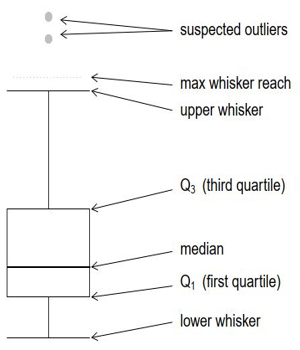

In [ ]:
url = f'{base_path}/BoxPlotdef.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((300, 350))

The actual box is from $Q_1$ to $Q_3$ and the median is drawn as a line inside this box. The **interquartile range** is the length of the box: $IQR = Q_3 - Q_1$. It *contains the middle 50% of the data*, so it is also a *measure of variability*. The **upper whisker** extends from $Q_3$ to the highest observation below $Q_3 + 1.5 \cdot IQR$. If there is no observation at or close to this value, the upper whisker may be considerably below this value. The observations above the upper whisker are considered to be **outliers** and denoted by dots or stars. Similarly, the lower whisker extends from $Q_1$ down to the lowest data point above $Q_1 - 1.5 \cdot IQR$ (it could be considerably above). The observations below this value are outliers as well. The figure below compares boxplots of `wage` from `CPS85` and `cesd` depression scores from `HELPrct`.

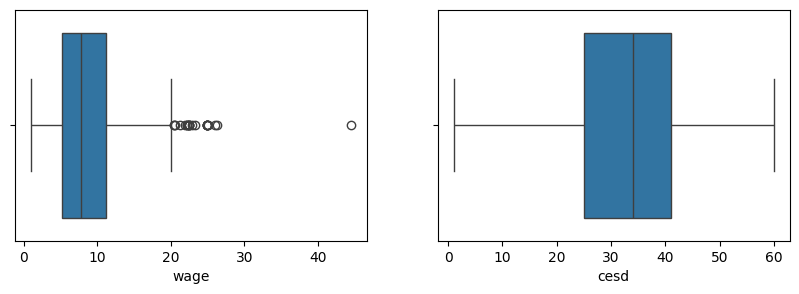

In [ ]:
url = f'{base_path}/HELPrct.csv'
HELPrct = pd.read_csv(url)

url = f'{base_path}/CPS85.csv'
CPS85 = pd.read_csv(url)

fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
sns.boxplot(data=CPS85, x="wage", ax=axes[0]);
sns.boxplot(data=HELPrct, x="cesd", ax=axes[1]);

The quantile() function can be used to compute any percentile. The $Q_1$ is the 25th percentile and $Q_3$ is the 75th. Below, we use these values to compute the interquartile range and whisker positions.

In [25]:
x = CPS85.wage # we can refer to just one variable with dot .wage

Q1 = np.quantile(x,0.25)
Q3 = np.quantile(x,0.75)
IQR = Q3-Q1

print('Q1, Q3, IQR, whisker lower bound, whisker upper bound = ', Q1, Q3, IQR, Q1-1.5*IQR, Q3+1.5*IQR)

Q1, Q3, IQR, whisker lower bound, whisker upper bound =  5.25 11.25 6.0 -3.75 20.25


The boxplot of wage is highly skewed, and many observations are identified as outliers above the upper whisker at 20.25. The lower whisker would have been at −3.75, which is below the lowest wage value, so it stops at that value. The CESD boxplot on the right side of the figure above is approximately symmetric and doesn't show any outliers.

We have considered mean, median, and quartile in separate commands, but there is a way to get a complete summary of several variables at once:

In [26]:
HELPrct[['cesd','mcs','pcs']].describe()

,cesd,mcs,pcs
count,453.000000,453.000000,453.000000
mean,32.847682,31.676678,48.048542
std,12.514460,12.839337,10.784603
min,1.000000,6.762923,14.074291
25%,25.000000,21.675755,40.384377
50%,34.000000,28.602417,48.876808
75%,41.000000,40.941338,56.953285
max,60.000000,62.175503,74.806328


In [27]:
CPS85[['wage','exper','educ']].describe()

,wage,exper,educ
count,534.000000,534.000000,534.000000
mean,9.024064,17.822097,13.018727
std,5.139097,12.379710,2.615373
min,1.000000,0.000000,2.000000
25%,5.250000,8.000000,12.000000
50%,7.780000,15.000000,12.000000
75%,11.250000,26.000000,15.000000
max,44.500000,55.000000,18.000000


The most extreme outlier in wage observations is particularly large; it is more than $40$ per hour. Let's compare sample statistics measurements with and without it by introducing a subset of data with `.loc[]`.

In [29]:
CPS85new = CPS85.loc[CPS85.wage<30] # select subset of data frame
print('Original wage summary: \n', CPS85.wage.describe())
print()
print('Updated wage summary: \n', CPS85new.wage.describe())

Original wage summary: 
 count    534.000000
mean       9.024064
std        5.139097
min        1.000000
25%        5.250000
50%        7.780000
75%       11.250000
max       44.500000
Name: wage, dtype: float64

Updated wage summary: 
 count    533.000000
mean       8.957505
std        4.908140
min        1.000000
25%        5.250000
50%        7.780000
75%       11.250000
max       26.290000
Name: wage, dtype: float64


The median and quartiles $Q_1$ and $Q_3$ (therefore $IQR$) did not change. They are so-called **robust statistics**—extreme observations have little effect. However, the mean and standard deviations changed (**non-robust statistics** affected strongly by extremes). In principle, if observations are highly skewed like incomes, median and $IQR$ are better measures of center and spread, while for more symmetrical data like IQ scores and heights, mean and standard deviation are better measures, respectively.

The center graph in the figure below shows that for the symmetrical bell-shaped data, mean, median, and mode coincide. The right-skewed data shows that extreme tail values pull the mean to the right much further than the median (robust). Analogously, for the left-skewed data, the extreme left tail values pull the mean to the left much more than the median.

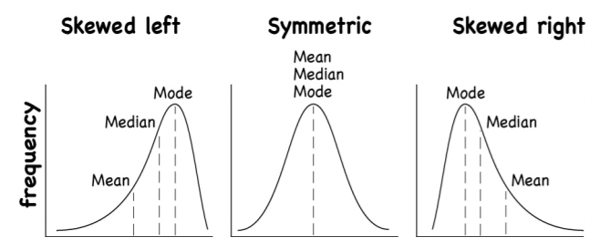

In [ ]:
url = f'{base_path}/MeanMedModeGraph.png'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 250))

## Categorical Data

Categorical data, whether nominal or ordinal, can only be counted in each level, mean, median, and other numerical summaries cannot be applied.

### Tables and Barplots

The `value_counts()` method applied to a categorical variable produces the level counts, then `plot.bar()` method creates a barplot graph. Consider, for example, the barplot of the substance variable in the substance abusers `HELPrct` data file shown in the figure below:

substance
alcohol    177
cocaine    152
heroin     124
Name: count, dtype: int64


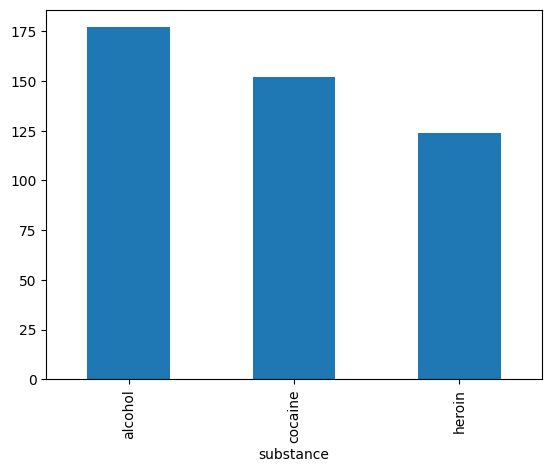

In [ ]:
url = f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url)

mytable = mydata['substance'].value_counts()
print(mytable)

mytable.plot.bar();

It shows the counts for each type of substance, with alcohol the highest, then cocaine, and finally heroin. The `normalize=True` option allows converting counts into proportions, which is more informative.

substance
alcohol    0.390728
cocaine    0.335541
heroin     0.273731
Name: proportion, dtype: float64


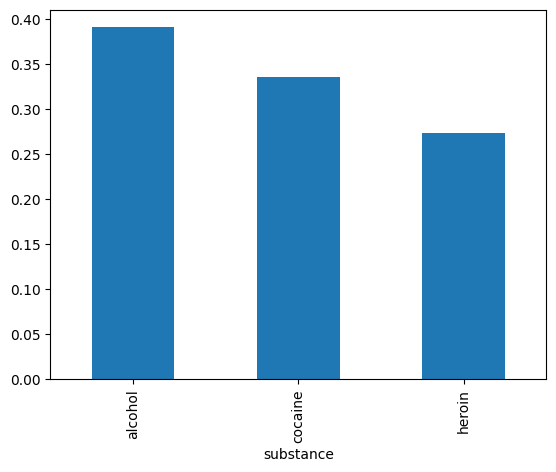

In [35]:
mytable = mydata['substance'].value_counts(normalize=True)
print(mytable)

mytable.plot.bar();

The same information as in a bar graph could be presented in a pie chart; however, human eyes discern differences in height far better than in angles and areas. Therefore, pie charts are *not used in scientific literature.

### Contingency Tables

In this section, a relationship between two categorical variables is investigated, leading to **contingency tables**. Continuing with the previous section on substance abuse, add homeless status to the consideration. The `pd.crosstab()` function produces the contingency table with or without the margins. The `.plot.bar()` method creates barplots, whether stacked or not.

substance  alcohol  cocaine  heroin
homeless                           
homeless       103       59      47
housed          74       93      77 

substance  alcohol  cocaine  heroin  All
homeless                                
homeless       103       59      47  209
housed          74       93      77  244
All            177      152     124  453 



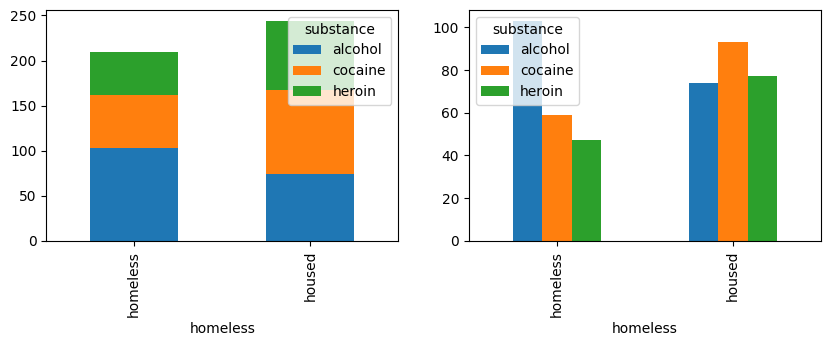

In [ ]:
url = f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url)

O = pd.crosstab(mydata.homeless, mydata.substance, margins=False)
Om = pd.crosstab(mydata.homeless, mydata.substance, margins=True)

print(O, '\n')
print(Om, '\n')

fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
O.plot.bar(stacked=True,ax=axes[0]);
O.plot.bar(stacked=False,ax=axes[1]);

Each value in the table represents the number of times a particular combination of variable outcomes occurred. For example, there are 59 homeless cocaine abusers and 74 housed alcoholics. The margins provide row and column totals. For example, the total number of alcoholics is $103 + 74 = 177$, and the total number of housed patients is $74 + 93 + 77 = 244$, and the grand total of all patients is 453. We can also create a table of proportions. The overall proportions are obtained by dividing each entry by the grand total:

In [38]:
pd.crosstab(mydata.homeless, mydata.substance, margins=True,normalize='all')

substance,alcohol,cocaine,heroin,All
homeless,,,,
homeless,0.227373,0.130243,0.103753,0.461369
housed,0.163355,0.205298,0.169978,0.538631
All,0.390728,0.335541,0.273731,1.000000


For example, the proportion of housed alcoholics out of the total is $74/453 = 0.163$. Analogously, the proportion of homeless cocaine abusers is $59/453 = 0.13$.

It is more informative to investigate conditional (row and column) proportions. 

Row proportions:

In [39]:
pd.crosstab(mydata.homeless, mydata.substance, margins=True, normalize='index')

substance,alcohol,cocaine,heroin
homeless,,,
homeless,0.492823,0.282297,0.224880
housed,0.303279,0.381148,0.315574
All,0.390728,0.335541,0.273731


The output provided a proportions breakdown for housed and homeless. For example, $103/209 = 0.493$ of all homeless are alcoholics, $59/209 = 0.282$ of all homeless are cocaine abusers, etc. Analogously, $74/244 = 0.303$ of all housed are alcoholics, etc.

Column proportions:

In [40]:
pd.crosstab(mydata.homeless, mydata.substance, margins=True, normalize='columns')

substance,alcohol,cocaine,heroin,All
homeless,,,,
homeless,0.581921,0.388158,0.379032,0.461369
housed,0.418079,0.611842,0.620968,0.538631


The output provided proportions by substance. For example, $103/177 = 0.582$ of all alcoholics are homeless, and $93/152 = 0.612$ of all cocaine abusers are housed. Note that the conditional proportions above vary for each group, which implies association. In Chapter 6, a formal chi-squared test for independence in contingency tables is derived.

### Comparing numerical data across groups

Oftentimes, it is essential to consider numerical data broken into groups by one or more categorical variables. For example, we may want to investigate depression scores broken down by gender using `groupby()`.

In [ ]:
url = f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url)

mydata.groupby('sex')['cesd'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,107.0,36.887850,13.017642,3.0,29.0,38.0,46.5,60.0
male,346.0,31.598266,12.103318,1.0,24.0,32.5,40.0,58.0


We can present graphical displays like boxplots, histograms, etc., broken down by categorical variables too.

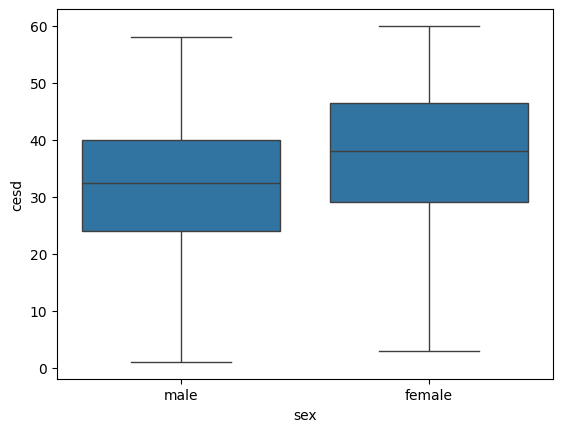

In [42]:
sns.boxplot(data=mydata,x='sex',y='cesd');

Wecan break up the cesd by more than one categorical variable- here gender and substance and represent the 2nd categorical variable by the hue of the graph:

In [43]:
mydata.groupby(['sex','substance'])['cesd'].describe()

count       mean        std   min    25%   50%    75%   max
sex    substance                                                             
female alcohol     36.0  40.277778   9.808484  21.0  34.25  40.0  47.25  58.0
       cocaine     41.0  32.975610  14.487042   3.0  23.00  35.0  42.00  60.0
       heroin      30.0  38.166667  13.274511   7.0  33.00  39.0  51.00  56.0
male   alcohol    141.0  32.865248  12.134496   4.0  24.00  33.0  41.00  58.0
       cocaine    111.0  28.108108  12.791582   1.0  18.00  29.0  37.50  55.0
       heroin      94.0  33.819149  10.309159   4.0  27.00  34.5  40.75  55.0

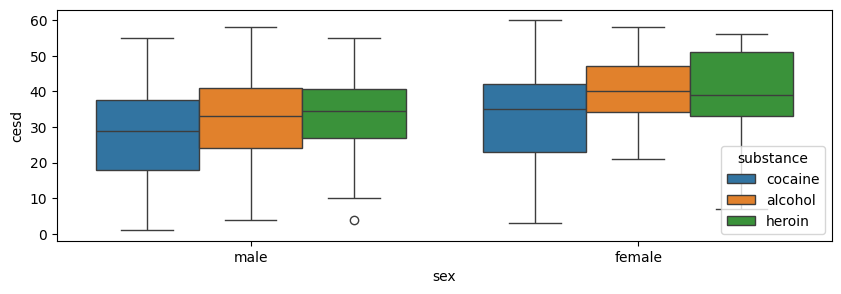

In [45]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=mydata, x='sex', y='cesd', hue='substance');

On the other hand, two histograms on the same graph overlap each other and are harder to distinguish. It may be better to display them seprately as shown in the two gures below. The option `col="sex"` creates two graphs in two columns.

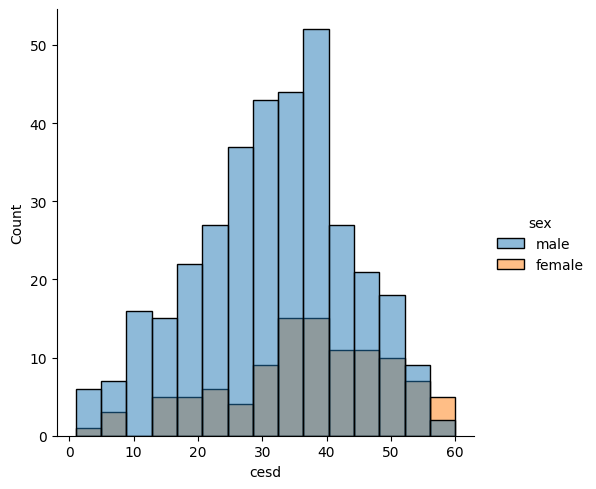

In [46]:
sns.displot(mydata, x="cesd", hue="sex");

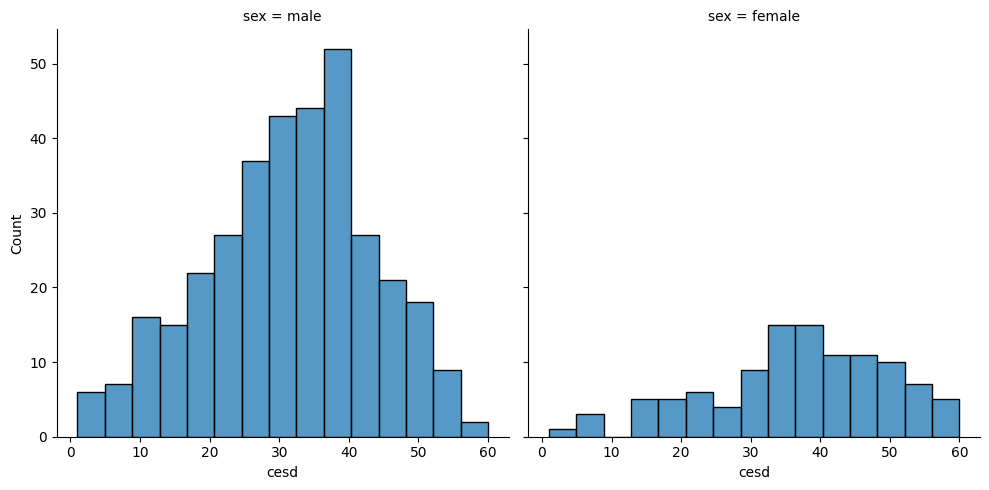

In [47]:
sns.displot(mydata, x="cesd", col="sex");

The graph with two separate histograms for males and females is preferrable. Alternatively, we can produce a density plot which is a smoothed version of a histogram as shown in the Figure below:

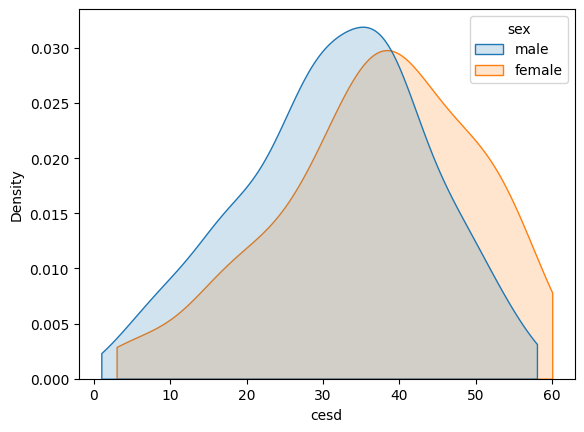

In [49]:
sns.kdeplot(data=mydata, x="cesd", hue="sex", cut=0, fill=True, common_norm=False, alpha=0.2);
# alpha provides transparency